# Regresja

In [14]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets
from sklearn.model_selection import cross_val_predict
from sklearn import linear_model
import matplotlib.pyplot as plt
import pandas as pd

Rozważmy zbiór Boston

In [15]:
data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

In [16]:
# get the data
boston_X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
boston_Y = boston.values[1::2, 2]

In [17]:
X=boston_X
y=boston_Y

# Zadanie 1
Znajdż najleprzy model za pomocą podwujną cross-validation (nested cross-validation, double cross-validation) .


In [18]:
from sklearn.model_selection import GridSearchCV
from sklearn import linear_model
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn import model_selection
from sklearn.model_selection import cross_val_score

seed=123
kfold = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)
kfold1 = model_selection.KFold(n_splits=5, shuffle=True, random_state=seed)

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import ElasticNet
from sklearn.pipeline import make_pipeline
from sklearn.model_selection import KFold, cross_val_score

data_url = "http://lib.stat.cmu.edu/datasets/boston"
boston = pd.read_csv(data_url, sep="\s+", skiprows=22, header=None)

# Prepare the data
boston_X = np.hstack([boston.values[::2, :], boston.values[1::2, :2]])
boston_Y = boston.values[1::2, 2]

X = boston_X
y = boston_Y

from sklearn.model_selection import KFold

seed = 123
outer_kfold = KFold(n_splits=5, shuffle=True, random_state=seed)
inner_kfold = KFold(n_splits=5, shuffle=True, random_state=seed)

best_model = None
best_score = -np.inf

for train_index, test_index in outer_kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4],
    'elasticnet__alpha': [1.0, 2.0, 3.0]
}

    grid_search = GridSearchCV(
        estimator=make_pipeline(PolynomialFeatures(), ElasticNet(tol=0.1)),
        param_grid=param_grid,
        scoring='r2',
        cv=inner_kfold, 
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Evaluate the model
    score = grid_search.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_model = grid_search.best_estimator_

print('Best Model: ', best_model)

# Evaluate the best model with cross-validation
scores_net = cross_val_score(best_model, X, y, scoring='r2', cv=5)
print('Nested Cross-Validation R2: %.3f +/- %.3f' % (np.mean(scores_net), np.std(scores_net)))

best_model = None
best_score = -np.inf

for train_index, test_index in outer_kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4],
}

    grid_search = GridSearchCV(
        estimator=make_pipeline(PolynomialFeatures(), linear_model.LinearRegression()),
        param_grid=param_grid,
        scoring='r2',
        cv=inner_kfold, 
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Evaluate the model
    score = grid_search.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_model = grid_search.best_estimator_

print('Best Model: ', best_model)

# Evaluate the best model with cross-validation
scores_LR = cross_val_score(best_model, X, y, scoring='r2', cv=5)
print('Nested Cross-Validation R2: %.3f +/- %.3f' % (np.mean(scores_LR), np.std(scores_LR)))

best_model = None
best_score = -np.inf

for train_index, test_index in outer_kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4],
    'ridge__alpha': [1.0, 2.0, 3.0]
}

    grid_search = GridSearchCV(
        estimator=make_pipeline(PolynomialFeatures(), Ridge(tol=0.1)),
        param_grid=param_grid,
        scoring='r2',
        cv=inner_kfold, 
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Evaluate the model
    score = grid_search.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_model = grid_search.best_estimator_

print('Best Model: ', best_model)

# Evaluate the best model with cross-validation
scores_ridge = cross_val_score(best_model, X, y, scoring='r2', cv=5)
print('Nested Cross-Validation R2: %.3f +/- %.3f' % (np.mean(scores_ridge), np.std(scores_ridge)))

best_model = None
best_score = -np.inf

for train_index, test_index in outer_kfold.split(X):
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]

    param_grid = {
    'polynomialfeatures__degree': [1, 2, 3, 4],
    'lasso__alpha': [1.0, 2.0, 3.0]
}

    grid_search = GridSearchCV(
        estimator=make_pipeline(PolynomialFeatures(), Lasso(tol=0.1)),
        param_grid=param_grid,
        scoring='r2',
        cv=inner_kfold, 
        n_jobs=-1
    )

    grid_search.fit(X_train, y_train)

    # Evaluate the model
    score = grid_search.score(X_test, y_test)

    if score > best_score:
        best_score = score
        best_model = grid_search.best_estimator_

print('Best Model: ', best_model)

# Evaluate the best model with cross-validation
scores_lasso = cross_val_score(best_model, X, y, scoring='r2', cv=5)
print('Nested Cross-Validation R2: %.3f +/- %.3f' % (np.mean(scores_lasso), np.std(scores_lasso)))

Best Model:  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('elasticnet', ElasticNet(tol=0.1))])
Nested Cross-Validation R2: 0.100 +/- 0.831
Best Model:  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('linearregression', LinearRegression())])
Nested Cross-Validation R2: -4.391 +/- 8.106


/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_ridge.py:255: UserWarning: Singular matrix in solving dual problem. Using least-squares solution instead.
  warnings.warn(
/opt/homeb

Best Model:  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures()),
                ('ridge', Ridge(tol=0.1))])
Nested Cross-Validation R2: -1.397 +/- 3.281
Best Model:  Pipeline(steps=[('polynomialfeatures', PolynomialFeatures(degree=3)),
                ('lasso', Lasso(alpha=3.0, tol=0.1))])
Nested Cross-Validation R2: 0.236 +/- 0.535


# Zadanie 2
Zwizualizuj wyniki.

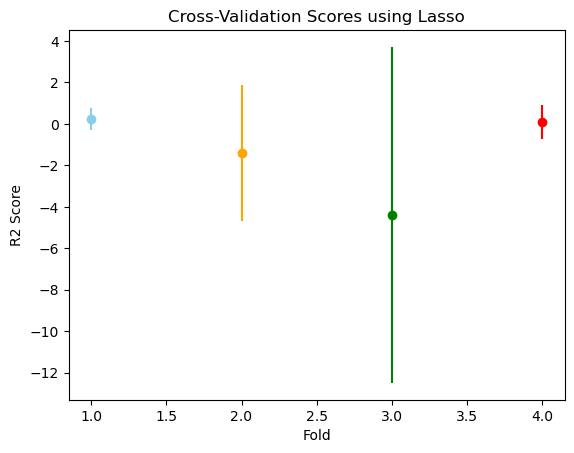

In [25]:
plt.figure()
# plt.bar(np.mean(scores_lasso), np.std(scores_lasso), color='skyblue')
plt.errorbar(1, y=np.mean(scores_lasso), yerr=np.std(scores_lasso), fmt='o', color='skyblue')
plt.errorbar(2, y=np.mean(scores_ridge), yerr=np.std(scores_ridge), fmt='o', color='orange')
plt.errorbar(3, y=np.mean(scores_LR), yerr=np.std(scores_LR), fmt='o', color='green')
plt.errorbar(4, y=np.mean(scores_net), yerr=np.std(scores_net), fmt='o', color='red')
plt.xlabel('Fold')
plt.ylabel('R2 Score')
plt.title('Cross-Validation Scores using Lasso')
plt.show()